# Grab-Microsoft Challenge 
## Traffic Management

- geohash6: geohash is a public domain geocoding system which encodes a geographic location into a short string of letters and digits with arbitrary precision. You are free to use any geohash library to encode/decode the geohashes into latitude and longitude or vice versa.(Examples:https://github.com/hkwi/python-geohash)
- day: the value indicates the sequential order and not a particular day of the month
- timestamp: start time of 15-minute intervals in the following format: <hour>:<minute>, where hour ranges from 0 to 23 and minute is either one of (0, 15, 30, 45)
- demand: aggregated demand normalised to be in the range [0,1]

### This is train some classical SVR machine learning model 
- Support Vector Regressor
- Rando Forest Regressor

#### Import python library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot matplotlib graph
%matplotlib inline

#=========================================================================
# Next, we will import the required modules. Then we will define a generic 
# classification function, which takes a model as input and determines the 
# Accuracy and Cross-Validation scores.
#=========================================================================

#Import models from scikit learn module:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.externals import joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Define Functions

In [25]:
#Generic function for making a classification model and accessing performance:

def compute_score(clf, X, y, scoring='neg_root_mean_squared_error'):
    xval = cross_val_score(clf, X, y, cv = 2, scoring=scoring)
    return np.mean(xval)

#-----------------------------------------------------------------
# Function for Random Decision Tree, Decision Tree CLassifier, 
# Random Forest Classifier and Gradient Boosting CLassifier
#-----------------------------------------------------------------
def classification_model_Test(model, X_train, y_train, X_test, y_test):
  #Fit the model:
  
  model.fit(X_train,y_train)

  print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
  print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))  
    
  #Make predictions on training set:
  predictions = model.predict(X_test)
     
  # Get performance metrics
  #cm = confusion_matrix(y_test,predictions)
  #print(metrics.classification_report(y_test,predictions))
  score = compute_score(clf=model, X=X_test, y=y_test, scoring='neg_root_mean_squared_error')
  r2_score = metrics.r2_score(y_test,predictions)
  
  # Print performance metrics

  print ('*************************************************************')
  print ('Metric Performance of : {0}\n'.format(model.__class__))
  #print('Confusion Matrix : \n', cm)
  print ('Cross Validation Score = {0:.3%}\n'.format(score))
  print ("Coefficient of determination:{0:.3f}".format(r2_score))
   
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train) 

# Checking on the feature importance weightage
def features_importance(clf, data, predictors, outcome):
    target = data[outcome]
    train = data[predictors]

    clf = clf.fit(train,target)
    
    features = pd.DataFrame()
    features['feature'] = train.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    print ('*************************************************************')
    features.plot(title = 'Features Importance',fontsize= 20, kind='barh', figsize=(50, 10))
    featimp = pd.Series(clf.feature_importances_, index=predictors).sort_values(ascending=False)
    print (featimp)
    print('\n**********************************************************')

#### Reading from Preprocessed dataset

In [3]:
xls  = pd.ExcelFile('data/Dataset_feature.xlsx')
data = pd.read_excel(xls, 'TrafficMgmt')
data

,day,hour,min,dow,lat,long,demand
0,0.283333,0.869565,0.000000,0.666667,0.533333,0.171429,0.020072
1,0.150000,0.608696,0.666667,0.500000,0.288889,0.200000,0.024721
2,0.133333,0.260870,0.333333,0.333333,0.644444,0.828571,0.102821
3,0.516667,0.217391,0.000000,0.666667,0.533333,0.428571,0.088755
4,0.233333,0.173913,0.000000,0.166667,0.288889,0.342857,0.074468
...,...,...,...,...,...,...,...
1048570,0.083333,0.347826,0.666667,1.000000,0.911111,0.771429,0.024022
1048571,0.366667,0.652174,0.666667,0.333333,0.111111,0.400000,0.005703
1048572,0.683333,0.652174,1.000000,0.000000,0.533333,0.200000,0.067131
1048573,0.016667,0.260870,0.666667,0.333333,0.711111,0.600000,0.151323


In [4]:
predictor_var = ['day', 'hour', 'min', 'dow', 'lat', 'long']
outcome_var   = 'demand'

#### Prepare training & test data

In [5]:
X = data.drop(outcome_var,axis=1)
y = data.drop(predictor_var,axis=1)
#y['demand'] = data['demand']
X.head()

,day,hour,min,dow,lat,long
0,0.283333,0.869565,0.000000,0.666667,0.533333,0.171429
1,0.150000,0.608696,0.666667,0.500000,0.288889,0.200000
2,0.133333,0.260870,0.333333,0.333333,0.644444,0.828571
3,0.516667,0.217391,0.000000,0.666667,0.533333,0.428571
4,0.233333,0.173913,0.000000,0.166667,0.288889,0.342857


In [6]:
y.shape

(1048575, 1)

In [7]:
X.shape

(1048575, 6)

#### Train-test-val dataset split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(671088, 6)

In [10]:
X_val.shape

(167772, 6)

In [11]:
X_test.shape

(209715, 6)

<h2><center>Create Model and test</center><h2>

<h3>Support Vector Machine Model<h3>

In [32]:
SVC_model = SVR(C=1, cache_size=200, coef0=0.0, epsilon = 0.001,
            degree=3, gamma=2, kernel='rbf', max_iter=-1, shrinking=True,
            tol=0.001, verbose=True)

In [ ]:
classification_model_Test(SVC_model, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

In [ ]:
model.best_params_

In [ ]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [ ]:
pred=SVC_model.predict(X_test)

In [ ]:
print(SVC_model.score(X_test,y_test))

### Random Forest Regressor

In [14]:
RFR_model = RandomForestRegressor(criterion = 'mse',max_depth = 10,max_features = 'sqrt',
                              n_estimators = 300)


In [22]:
classification_model_Test(RFR_model, X_train, y_train, X_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.364
Accuracy on test set: 0.365


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


*************************************************************
Metric Performance of : <class 'sklearn.ensemble._forest.RandomForestRegressor'>

Cross Validation Score = -12.628%

Coefficient of determination:0.365


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


NameError: name 'dataset' is not defined

*************************************************************
lat     0.438260
long    0.407651
hour    0.130037
dow     0.016233
day     0.007178
min     0.000641
dtype: float64

**********************************************************


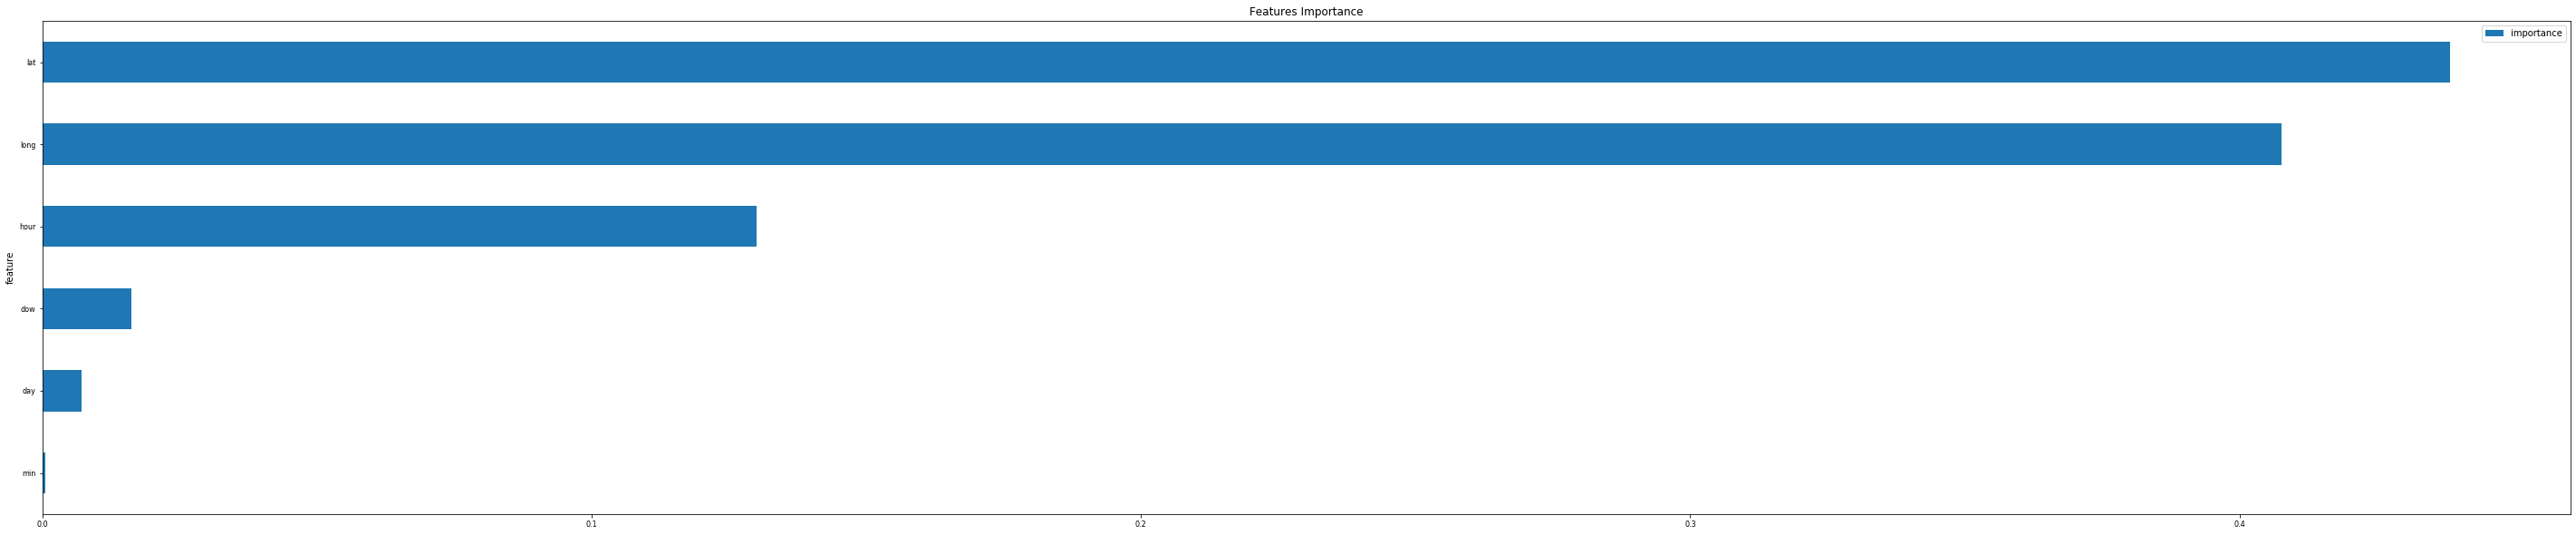

In [23]:
features_importance(RFR_model, data,predictor_var,outcome_var)

In [27]:
pred=model.predict(X_test)

In [28]:
print(model.score(X_test,y_test))

0.3721274291512562


In [31]:
## We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "Random_Forest_trained_model.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'Random_Forest_trained_model.pkl') 

['Random_Forest_trained_model.pkl']